In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, mannwhitneyu

In [29]:
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"] = 14

# Preprocessing data

In [30]:
!wget "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

--2022-12-18 01:57:14--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 35735 (35K) [text/plain]
Сохранение в: «BostonHousing.csv.4»

BostonHousing.csv.4 100%[===================>]  34,90K  --.-KB/s    за 0,009s  

2022-12-18 01:57:14 (3,84 MB/s) - «BostonHousing.csv.4» сохранён [35735/35735]



In [31]:
data = pd.read_csv("BostonHousing.csv", sep = ',')

In [32]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Meanings of columns:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [33]:
#basic statistics
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [34]:
features = data.drop(['medv'], axis = 1)
target = data['medv']

In [35]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [36]:
features.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

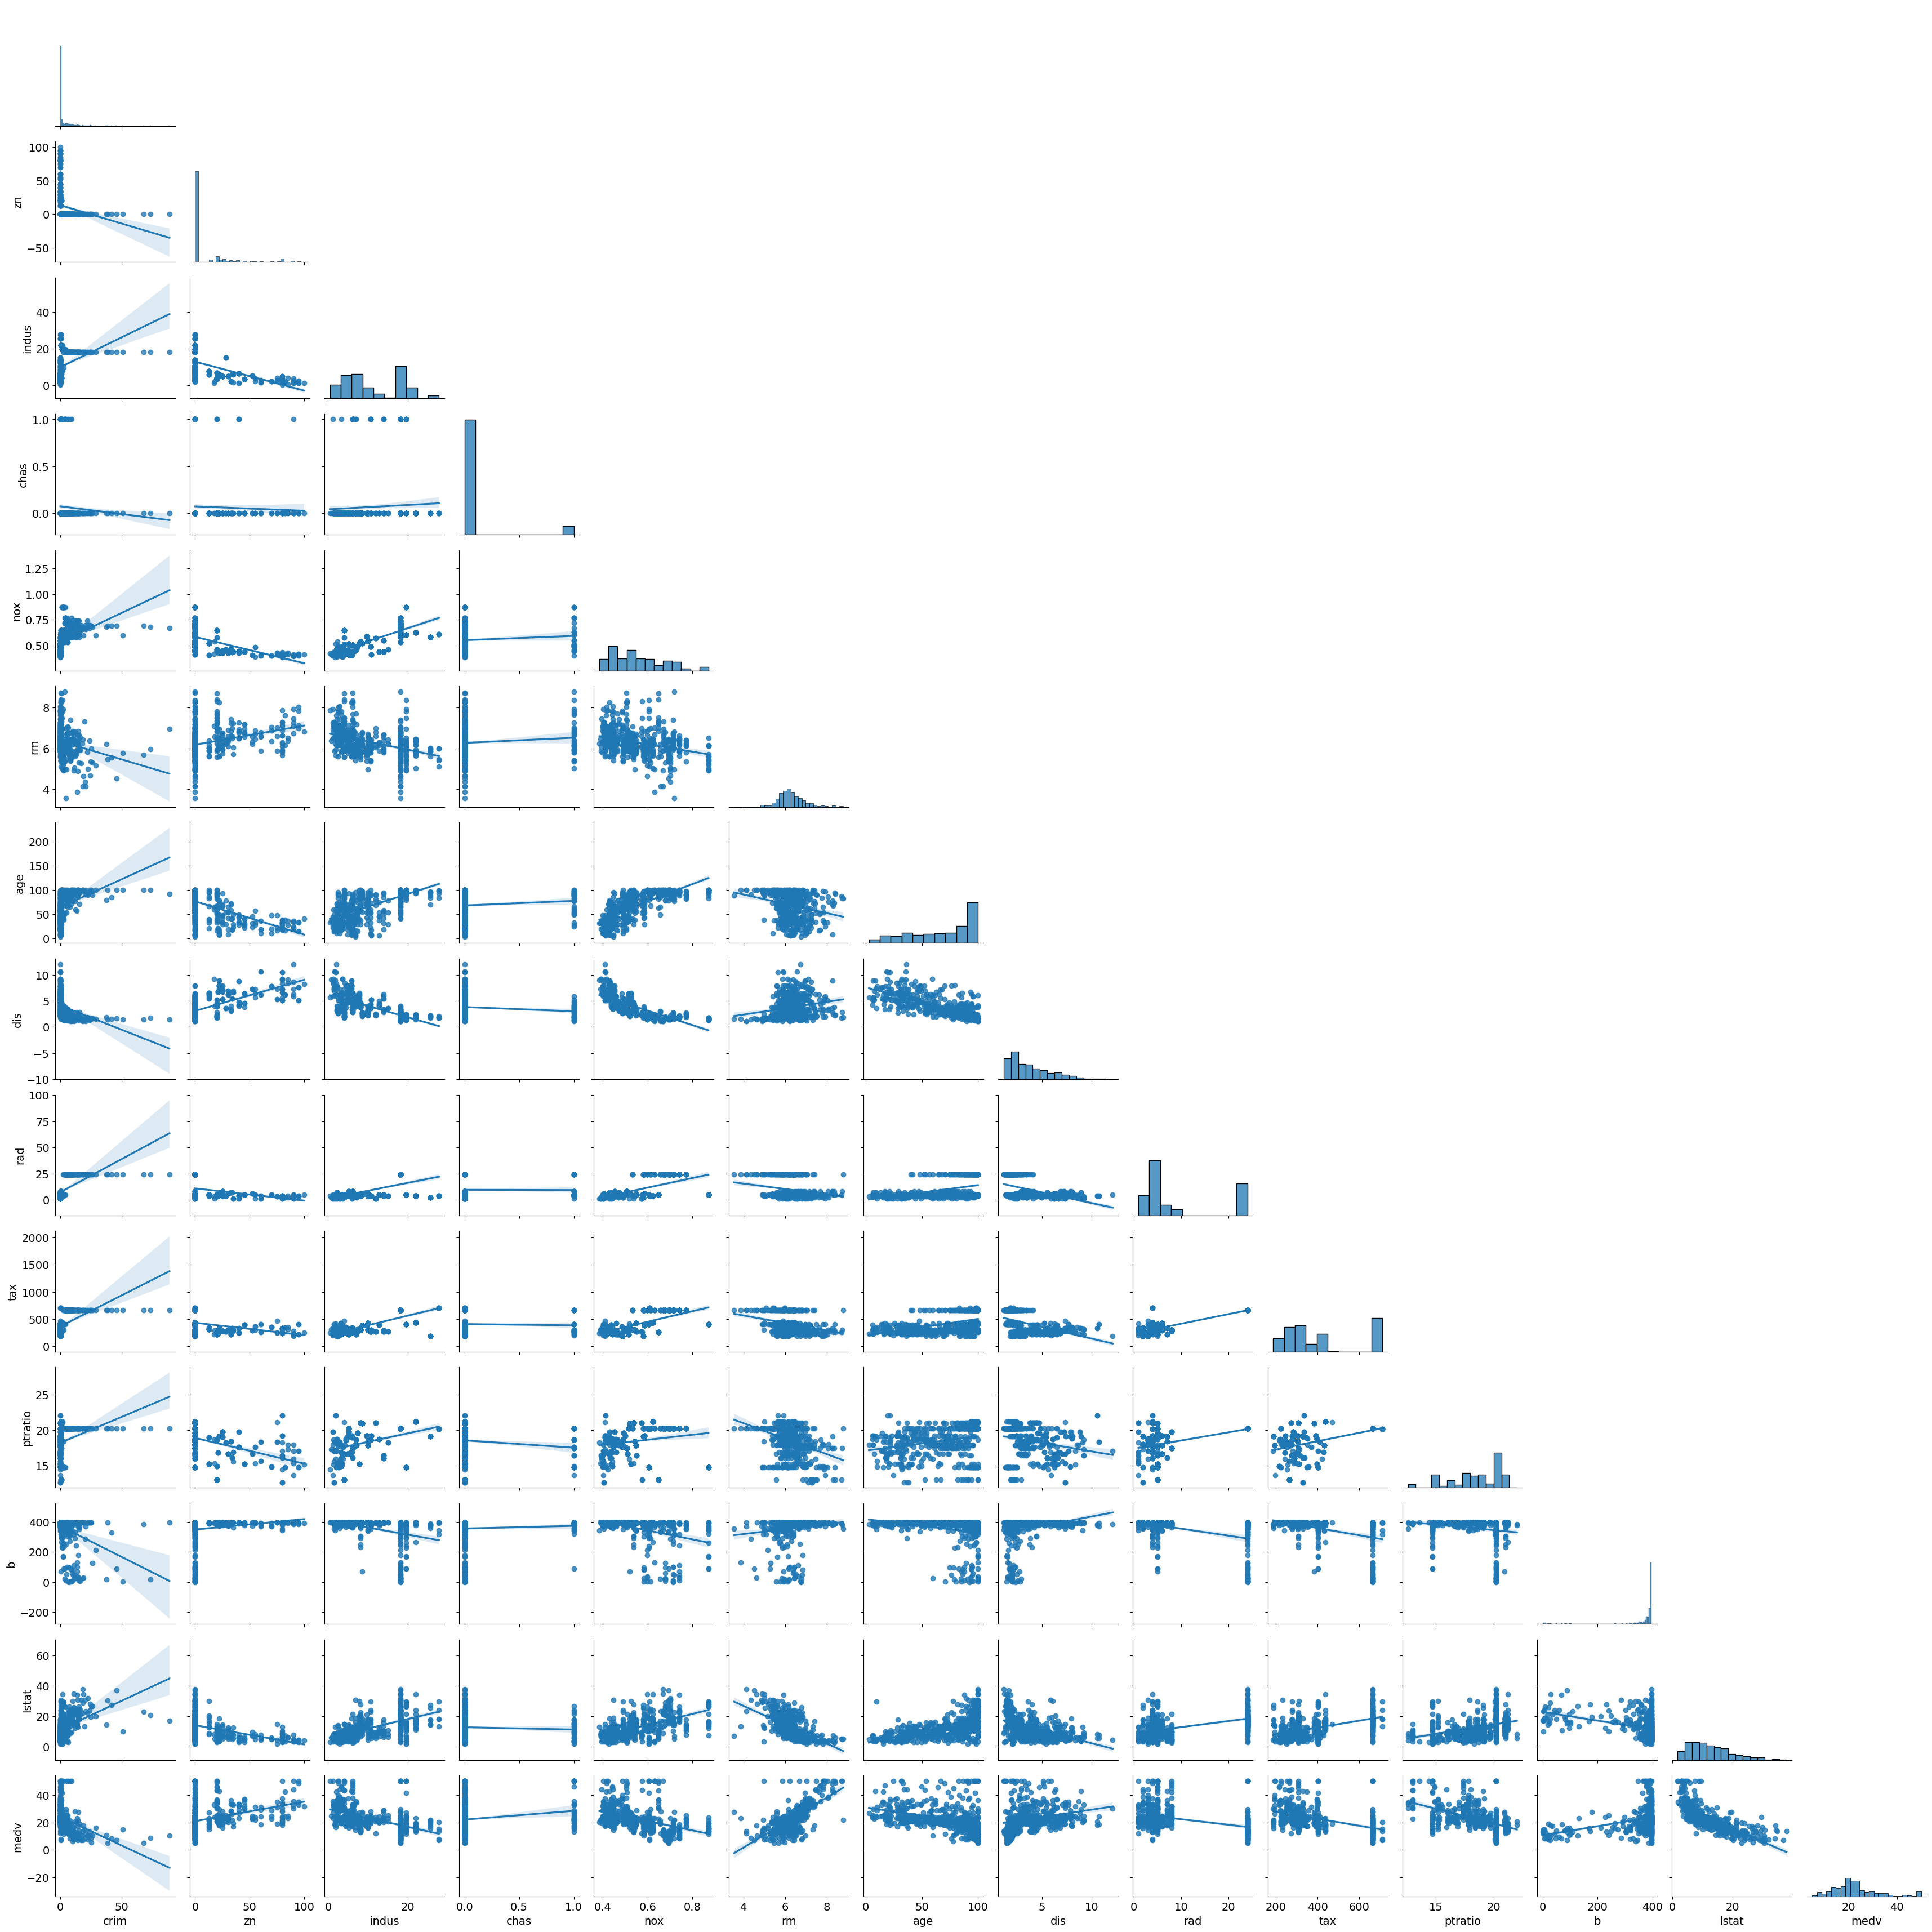

In [37]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg", corner=True);

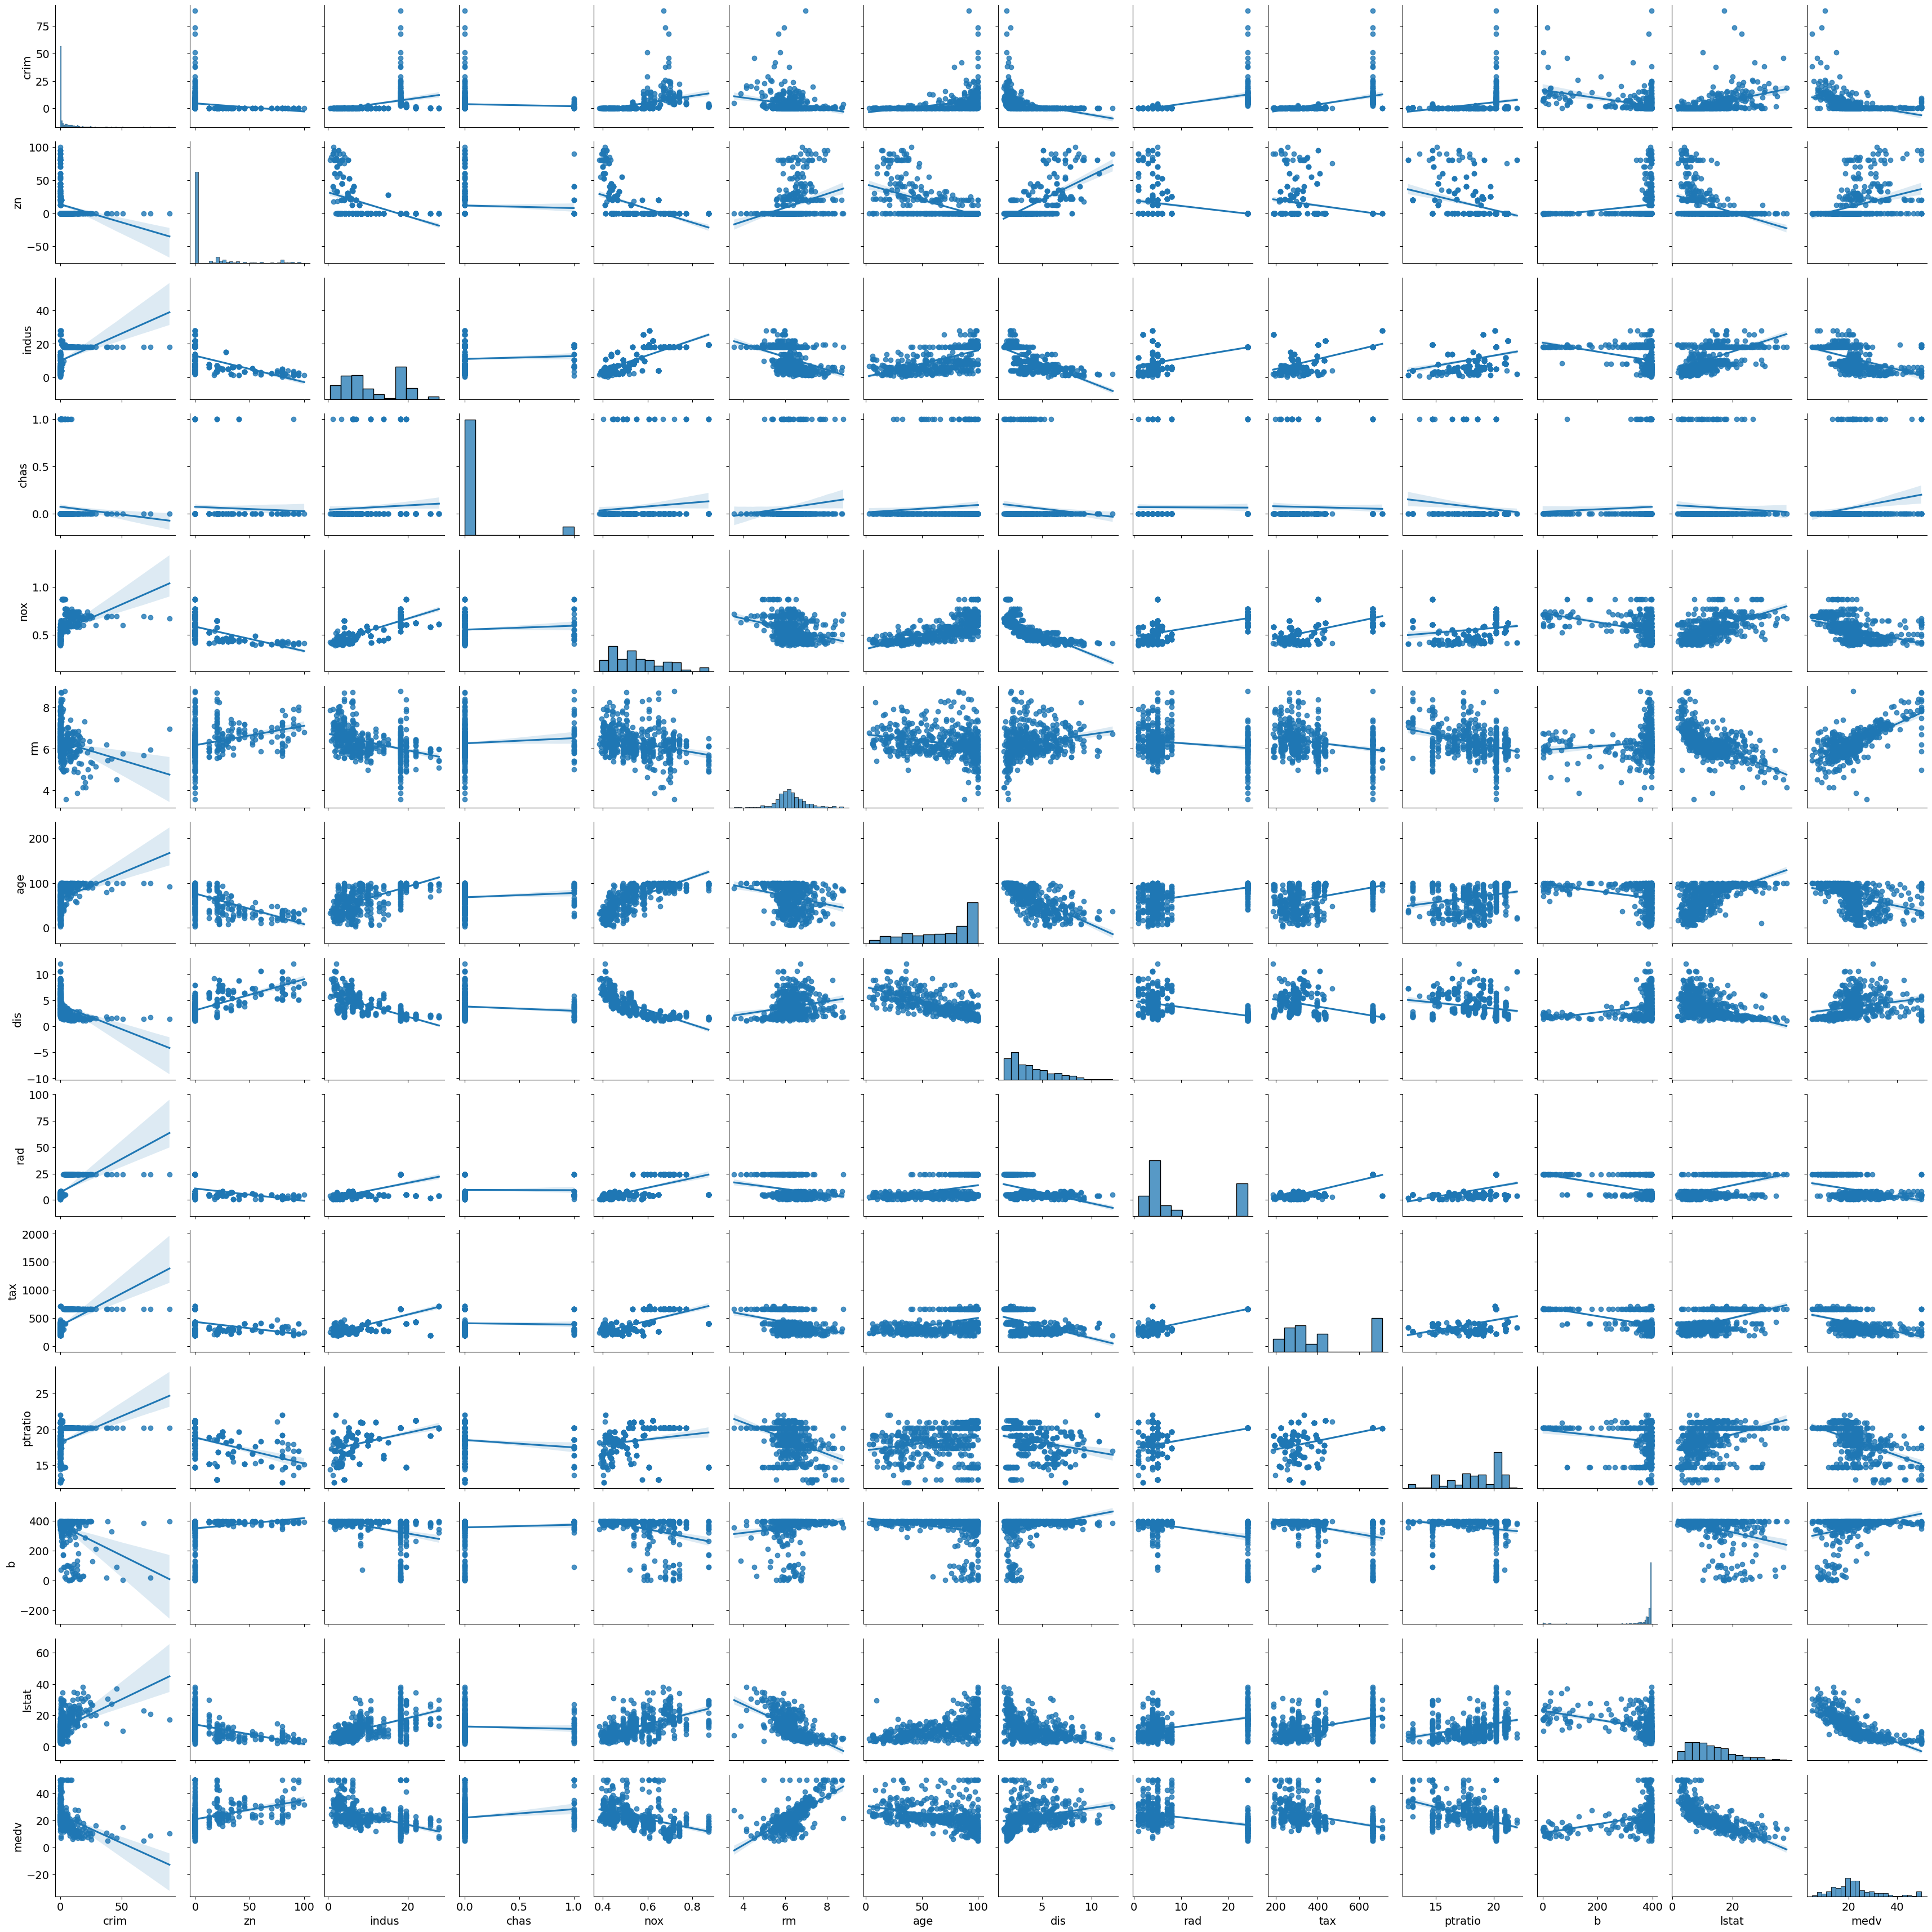

In [38]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg");

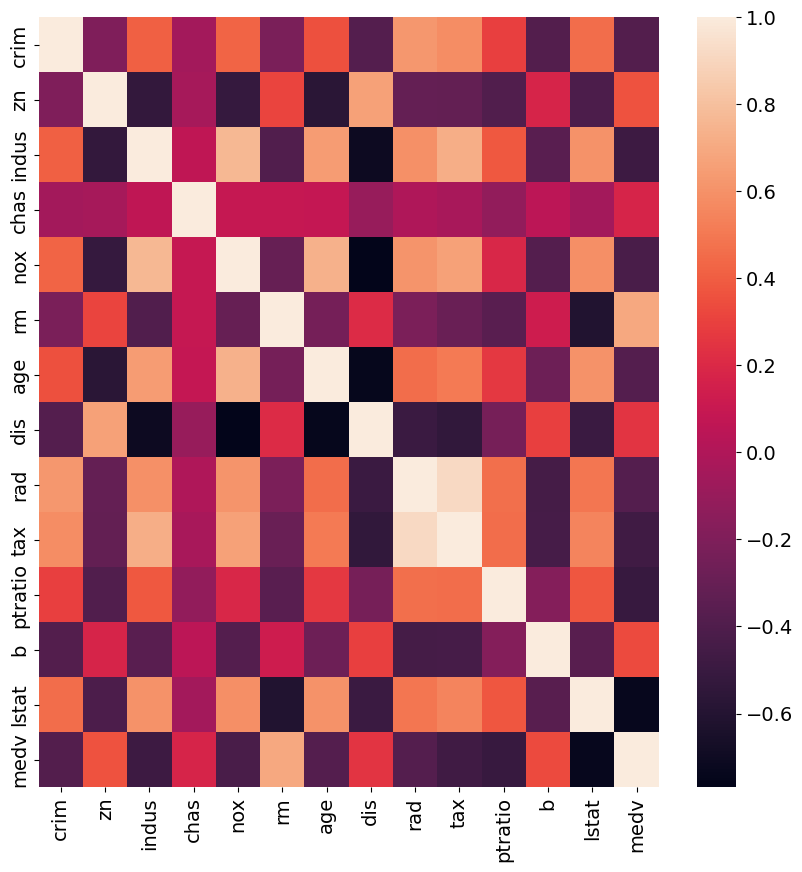

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(pd.concat([features, target], axis=1).corr());

In [40]:
pd.concat([features, target], axis=1).corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Linear regression

In [41]:
#standartization
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [42]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        01:59:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'const'),
  Text(1, 0, 'crim'),
  Text(2, 0, 'zn'),
  Text(3, 0, 'indus'),
  Text(4, 0, 'chas'),
  Text(5, 0, 'nox'),
  Text(6, 0, 'rm'),
  Text(7, 0, 'age'),
  Text(8, 0, 'dis'),
  Text(9, 0, 'rad'),
  Text(10, 0, 'tax'),
  Text(11, 0, 'ptratio'),
  Text(12, 0, 'b'),
  Text(13, 0, 'lstat')])

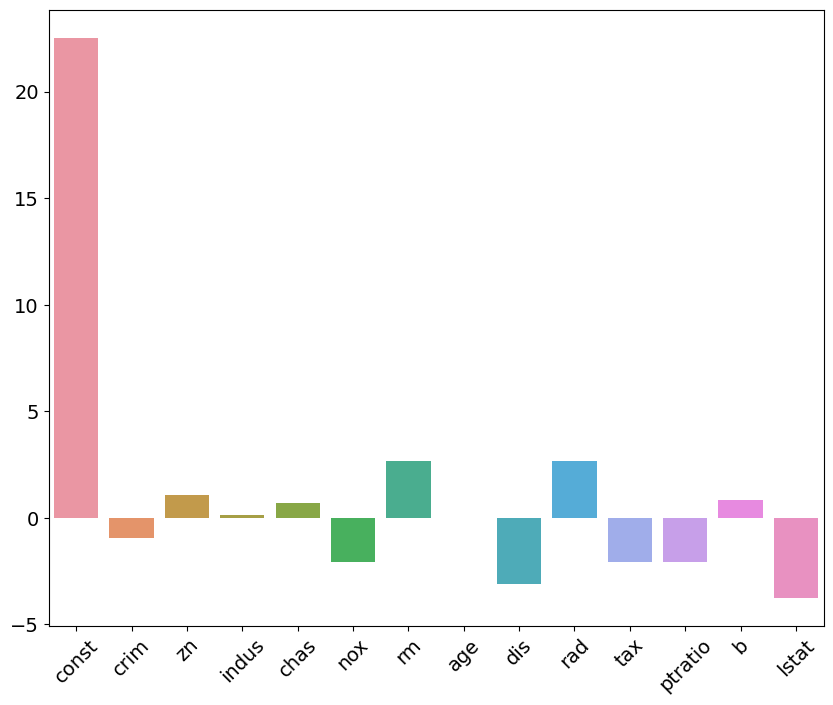

In [47]:
sns.barplot(x=results_scaled.params.index, y=results_scaled.params)
plt.xticks(rotation=45)

In [50]:
prediction_result = results_scaled.get_prediction(X)
target_pred = prediction_result.predicted_mean

In [51]:
prediction_result

In [53]:
X @ results_scaled.params

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

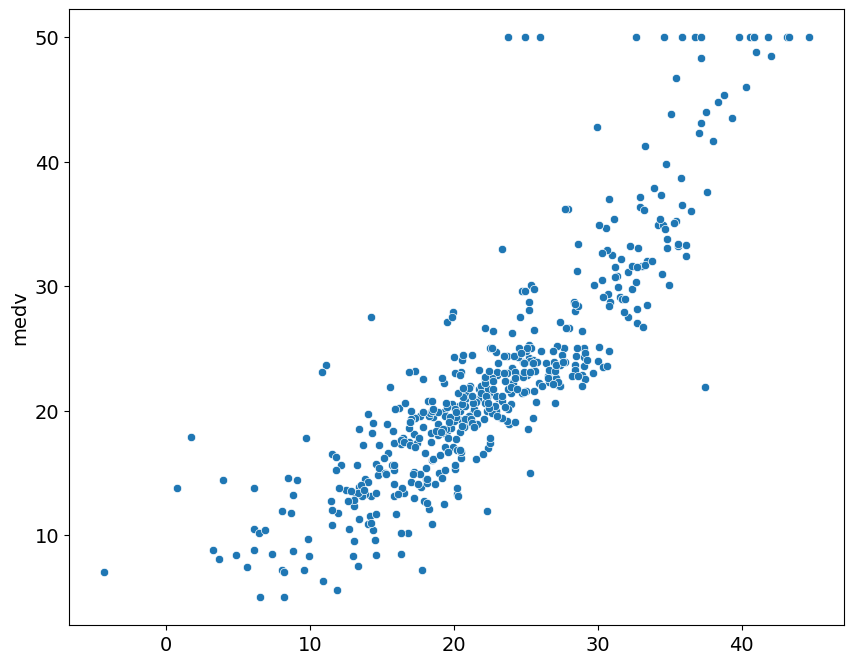

In [55]:
sns.scatterplot(x=target_pred, y=target);

In [56]:
def calculate_r2(target, prediction):
    r2 = 1 - np.power((target - prediction), 2).sum() \
         / np.power((target - target.mean()), 2).sum()

    return r2


def calculate_r2_adj(target, prediction, features):
    n, p = features.shape
    r2 = calculate_r2(target, prediction)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p)

    return r2_adj

In [57]:
calculate_r2(target, target_pred), calculate_r2_adj(target, target_pred, X)

(0.7406426641094094, 0.7337897263724629)

## Checking for the linearity of the relationship

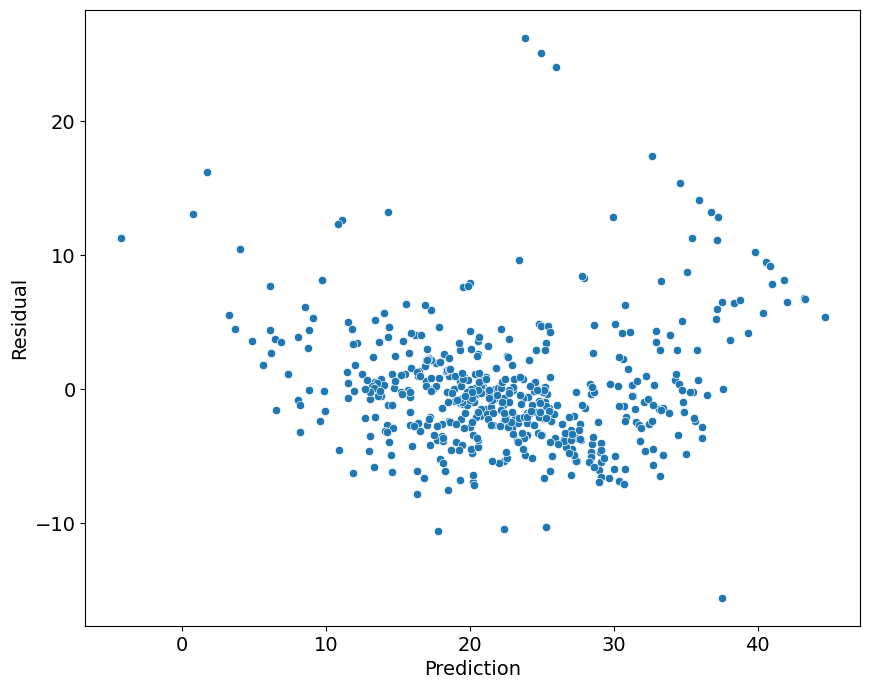

In [59]:
resid_full = target - target_pred
sns.scatterplot(x=target_pred, y=resid_full)
plt.xlabel("Prediction")
plt.ylabel("Residual");

## Checking influential observations

<AxesSubplot: >

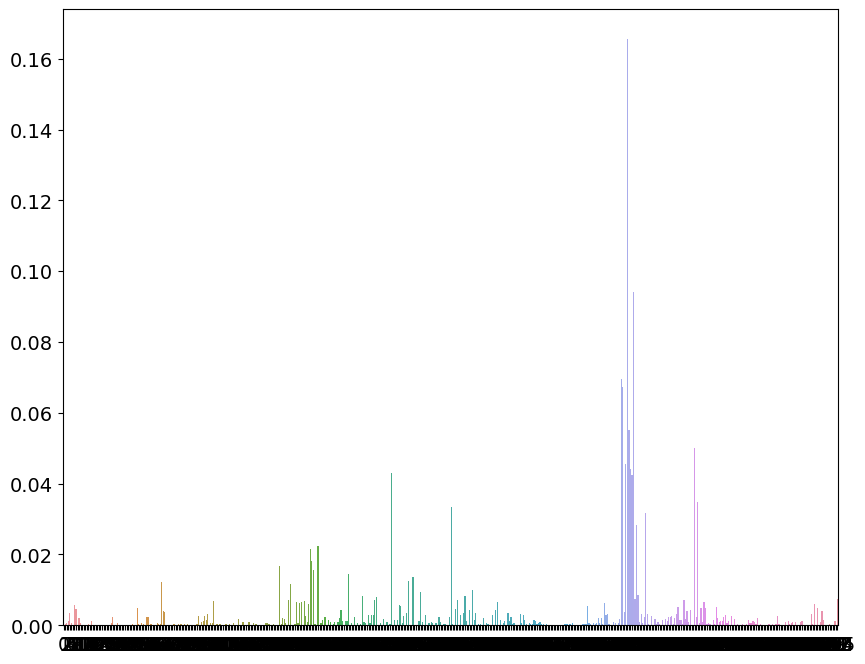

In [78]:
#cooks distances
influence = results_scaled.get_influence()
cooks = influence.cooks_distance
sns.barplot(x=np.arange(len(cooks[0])),y=cooks[0])

## Checking for normal distribution of predicted values

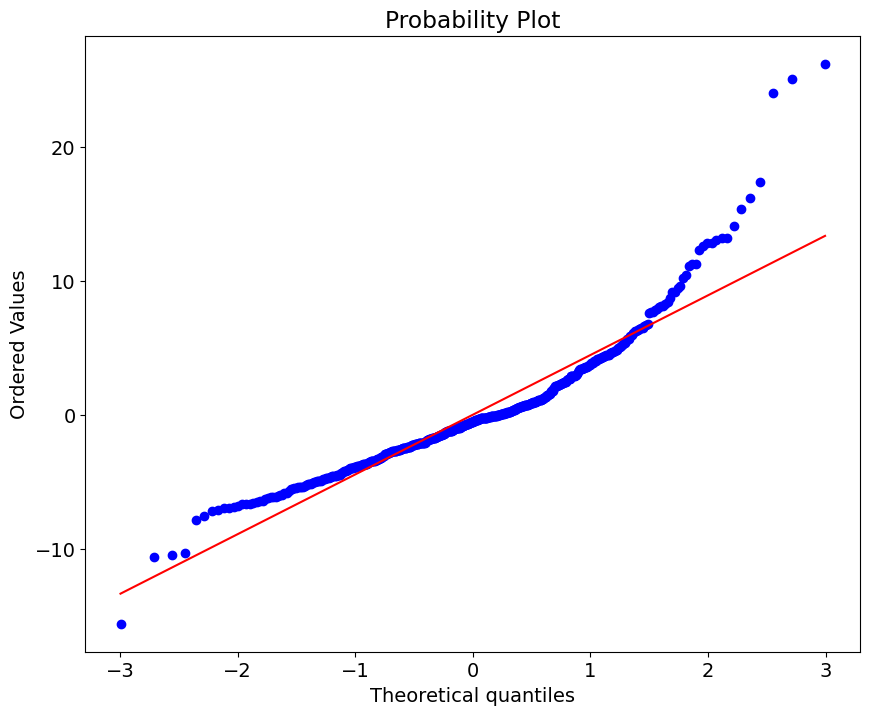

In [66]:
stats.probplot(resid_full, dist="norm", plot=plt)
plt.show()

The Q-Q plot shows that it isn't possible to say that the standardized residuals are normally distributed

## Checking for independence of observations

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


If the predictor has a VIF value greater than 2, then it should be excluded from the model. In our case, we see the presence of multicollinearity.

In [79]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data

In [80]:
model_updated = sm.OLS(target, X.drop(columns=["tax"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.21e-133
Time:                        03:36:12   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.213    105.772      0.0

In [81]:
calculate_vif(X.drop(columns=["tax"]))

,feature,VIF
0,const,1.000000
1,crim,1.791940
2,zn,2.184240
3,indus,3.226015
4,chas,1.058220
5,nox,4.369271
6,rm,1.923075
7,age,3.098044
8,dis,3.954446
9,rad,2.837494


In [83]:
model_updated = sm.OLS(target, X.drop(columns=["tax", "nox"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          1.03e-129
Time:                        03:38:06   Log-Likelihood:                -1516.1
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.218    103.429      0.0

In [84]:
calculate_vif(X.drop(columns=["tax", "nox"]))

,feature,VIF
0,const,1.000000
1,crim,1.785343
2,zn,2.183394
3,indus,2.872809
4,chas,1.057571
5,rm,1.904013
6,age,2.875130
7,dis,3.641492
8,rad,2.533616
9,ptratio,1.598944


In [85]:
model_updated = sm.OLS(target, X.drop(columns=["tax", "nox", "dis"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          6.23e-123
Time:                        03:41:14   Log-Likelihood:                -1534.7
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     495   BIC:                             3138.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.226     99.799      0.0

In [86]:
calculate_vif(X.drop(columns=["tax", "nox", "dis"]))

,feature,VIF
0,const,1.000000
1,crim,1.765881
2,zn,1.758636
3,indus,2.517520
4,chas,1.056840
5,rm,1.879925
6,age,2.423551
7,rad,2.507024
8,ptratio,1.530992
9,b,1.339553


### Conclusions
This model is not ideal and requires dropping other predictors which have no correlation and only negative effect, but in general all graphs are good and we can see that predictions are OK